In [172]:
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns


In [184]:
data=pd.read_csv("fatal-police-shootings-data (1).csv")

In [185]:
len(data.columns)

17

In [187]:
data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6206,6770,NaN,2021-04-10,shot,gun,NaN,M,NaN,Metairie,LA,False,attack,NaN,False,-90.210,30.003,True
6207,6771,NaN,2021-04-10,shot,undetermined,NaN,M,NaN,Rockford,IL,False,undetermined,NaN,False,NaN,NaN,True
6208,6775,NaN,2021-04-10,shot,knife,NaN,M,NaN,San Marcos,TX,False,attack,Not fleeing,False,-97.933,29.874,True
6209,6767,Daunte Wright,2021-04-11,shot,undetermined,20.0,M,B,Brooklyn,MN,False,undetermined,NaN,True,-93.341,45.070,True


In [188]:
data.race = data.race.replace({'A':'Asian', 'W':'White','H':'Hispanic','B':'black',\
                                      'O':'Other','N':'Native American'}).fillna('unknown')
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [189]:
data["gender"].value_counts()

M    5934
F     276
Name: gender, dtype: int64

First of all, we need to transform the data preparing for visualization task 

1. How does the shotting trend evolve overtime ?  General population 

2. Is it true that the trend that we found above be generalized to different subpopulations ? 

----) state-wise

----) red states vs blue states 

----) races   

In [190]:
def helper(x):
    return x[:-3]

In [191]:
# Overall Trend 

In [192]:
data["date"]=data["date"].apply(helper)

In [193]:
trend=pd.DataFrame(data.groupby("date")["id"].count())

In [194]:
trend.reset_index(inplace=True)

In [195]:
trend["count"]=trend["id"]
trend=trend.drop("id",axis=1)
trend

,date,count
0,2015-01,76
1,2015-02,77
2,2015-03,92
3,2015-04,84
4,2015-05,71
...,...,...
71,2020-12,89
72,2021-01,78
73,2021-02,86
74,2021-03,67


In [1]:
alt.Chart(trend).mark_line().encode(
 x='date',
 y='count',
 tooltip=["date","count"]
).interactive()

NameError: name 'alt' is not defined

In [197]:
trend_year=trend["date"].apply(lambda x:x[:-3])
trend["date"]=trend_year

In [198]:
trend

,date,count
0,2015,76
1,2015,77
2,2015,92
3,2015,84
4,2015,71
...,...,...
71,2020,89
72,2021,78
73,2021,86
74,2021,67


In [199]:
trend_year=pd.DataFrame(trend.groupby("date")["count"].sum()).reset_index()

In [200]:
alt.Chart(trend_year).mark_line().encode(
 x='date',
 y='count',
 tooltip=["date","count"]
).interactive()

alt.Chart(...)

In [201]:
races=pd.DataFrame(data.groupby(["race","date"])["id"].count())

In [202]:
races["count"]=races["id"]

In [203]:
races=races.reset_index()
races

,race,date,id,count
0,Asian,2015-01,2,2
1,Asian,2015-03,2,2
2,Asian,2015-04,2,2
3,Asian,2015-05,1,1
4,Asian,2015-07,1,1
...,...,...,...,...
436,unknown,2020-12,16,16
437,unknown,2021-01,14,14
438,unknown,2021-02,16,16
439,unknown,2021-03,17,17


In [204]:
races=races.drop("id",axis=1)

In [205]:
races

,race,date,count
0,Asian,2015-01,2
1,Asian,2015-03,2
2,Asian,2015-04,2
3,Asian,2015-05,1
4,Asian,2015-07,1
...,...,...,...
436,unknown,2020-12,16
437,unknown,2021-01,14
438,unknown,2021-02,16
439,unknown,2021-03,17


In [206]:
list_races=list(races["race"].value_counts().index)
list_races

['Hispanic', 'White', 'black', 'unknown', 'Asian', 'Native American', 'Other']

In [207]:
race_dropdown = alt.binding_select(options=np.array(list_races))
race_select = alt.selection_single(fields=["race"], bind=race_dropdown, name="select",clear=True)
color = alt.condition(race_select,
                    alt.Color('race:N', legend=None),
                    alt.value('lightgray'))



alt.Chart(races,title="fatal shootings over time for different races").mark_line().encode(
    x='date',
    y='count',
    color=color,
    tooltip=["date","count","race"]
).add_selection(
    race_select).interactive()

alt.Chart(...)

In [208]:
races_1=pd.DataFrame({"race":list(list_races)})

selection = alt.selection_multi(fields=['race'])
color = alt.condition(selection, alt.Color('race:N'), alt.value('lightgray'))

selector1 = alt.Chart(races_1).mark_rect().encode(y='race', color=color).add_selection(selection)
selector2 = alt.Chart(races,title="fatal shootings over time for different races").mark_line().encode(x='date', y="count", color='race').transform_filter(selection)

selector1 | selector2

alt.HConcatChart(...)

In [209]:
data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6206,6770,NaN,2021-04,shot,gun,NaN,M,unknown,Metairie,LA,False,attack,NaN,False,-90.210,30.003,True
6207,6771,NaN,2021-04,shot,undetermined,NaN,M,unknown,Rockford,IL,False,undetermined,NaN,False,NaN,NaN,True
6208,6775,NaN,2021-04,shot,knife,NaN,M,unknown,San Marcos,TX,False,attack,Not fleeing,False,-97.933,29.874,True
6209,6767,Daunte Wright,2021-04,shot,undetermined,20.0,M,black,Brooklyn,MN,False,undetermined,NaN,True,-93.341,45.070,True


In [210]:
values=data["armed"].value_counts()

In [211]:
values[values>10]

gun                3554
knife               909
unarmed             401
toy weapon          207
vehicle             192
undetermined        175
unknown weapon       91
machete              49
Taser                29
ax                   24
sword                23
baseball bat         20
gun and knife        19
hammer               18
gun and vehicle      16
metal pipe           15
screwdriver          15
hatchet              13
box cutter           13
sharp object         12
gun and car          11
BB gun               11
Name: armed, dtype: int64

In [212]:
values["unarmed"]

401

In [213]:
data["armed"]

0                gun
1                gun
2            unarmed
3         toy weapon
4           nail gun
            ...     
6206             gun
6207    undetermined
6208           knife
6209    undetermined
6210             gun
Name: armed, Length: 6211, dtype: object

In [214]:
def helper2(x):
    if x!="unarmed":
        return "lethal weapon"
    else:
        return "unarmed"

In [215]:
data["armed"]=data["armed"].apply(helper2)

In [220]:
data=data[data["race"]!="Other"]
data=data[data["race"]!="Native American"]

In [222]:
data=data[data["race"]!="unknown"]

In [223]:
new = data.pivot_table(
 values="id",
 index="armed",
 columns="race",
 aggfunc="count"
 )
new=(new/new.sum()).T
new

armed,lethal weapon,unarmed
race,,
Asian,0.923077,0.076923
Hispanic,0.929591,0.070409
White,0.941727,0.058273
black,0.909759,0.090241


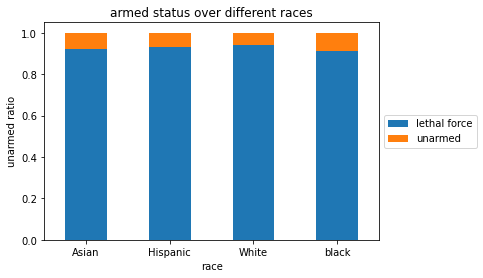

In [226]:
ax = new.plot(kind='bar', stacked=True, rot=0,
 title='armed status over different races')

ax.legend(("lethal force","unarmed"), loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel("unarmed ratio");